In [1]:
punlearn hexgrid
plist hexgrid


Parameters for /home/kjg/cxcds_param4/hexgrid.par

        infile =                  Input image
       outfile =                  Output hexagon grid image
       sidelen = 10               Side length of hexagons
       (binimg = )                Output image file
         (xref = 0)               X coordinate of reference point (image coordinates)
         (yref = 0)               Y coordinate of reference point (image coordinates)
      (verbose = 0)               Tool chatter level
      (clobber = no)              Remove outfile if it already exists?
         (mode = ql)              



In [2]:
dmstat abell665.flux.asm cen+ sig- med- 

-(x, y)
    min:	0 	      @:	( 3277.5 3485.5 )
    max:	3.6059454265e-07 	      @:	( 4069.5 4021.5 )
cntrd[log] :	( 720.08042887 679.07468657 )
cntrd[phys]:	( 4095.6608577 4207.6493731 )
   good:	1098841 
   null:	879399 


In [3]:
ix=`stk_read_num ")dmstat.out_cntrd_log" 1 echo+`
iy=`stk_read_num ")dmstat.out_cntrd_log" 2 echo+`


In [4]:
echo $ix $iy

720.08042887 679.07468657


In [5]:
/bin/rm -rf hexgrid
mkdir hexgrid
hexgrid abell665.flux.asm  hexgrid/hex30px.map side=15 binimg=hexgrid/hex30px.img \
  xref=$ix yref=$iy clob+

In [6]:
###map2reg hexgrid/hex30px.map hexgrid/hex30px.reg clob+
dmimggrad hexgrid/hex30px.map hexgrid/hex30px.grad sobel mag clob+

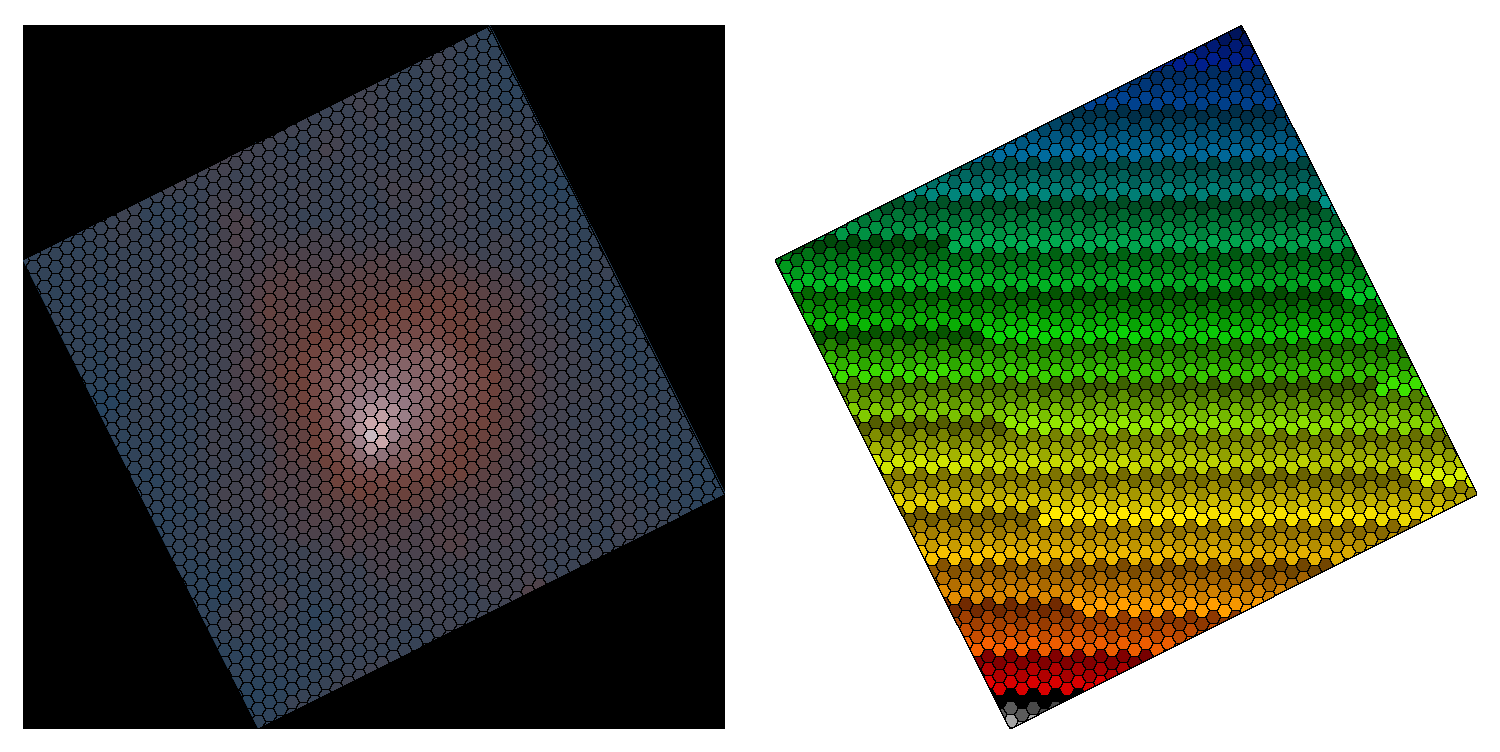

In [7]:
ds9 -geometry 1500x800 hexgrid/hex30px.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask hexgrid/hex30px.grad -nomask \
    hexgrid/hex30px.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask hexgrid/hex30px.grad -nomask \
    -saveimage png hexgrid/hex30px.png -exit

display < hexgrid/hex30px.png

In [8]:
hexgrid abell665.flux.asm  hexgrid/hex50px.map side=50 binimg=hexgrid/hex50px.img \
  xref=$ix yref=$iy clob+

In [9]:
###map2reg hexgrid/hex30px.map hexgrid/hex30px.reg clob+
dmimggrad hexgrid/hex50px.map hexgrid/hex50px.grad sobel mag clob+



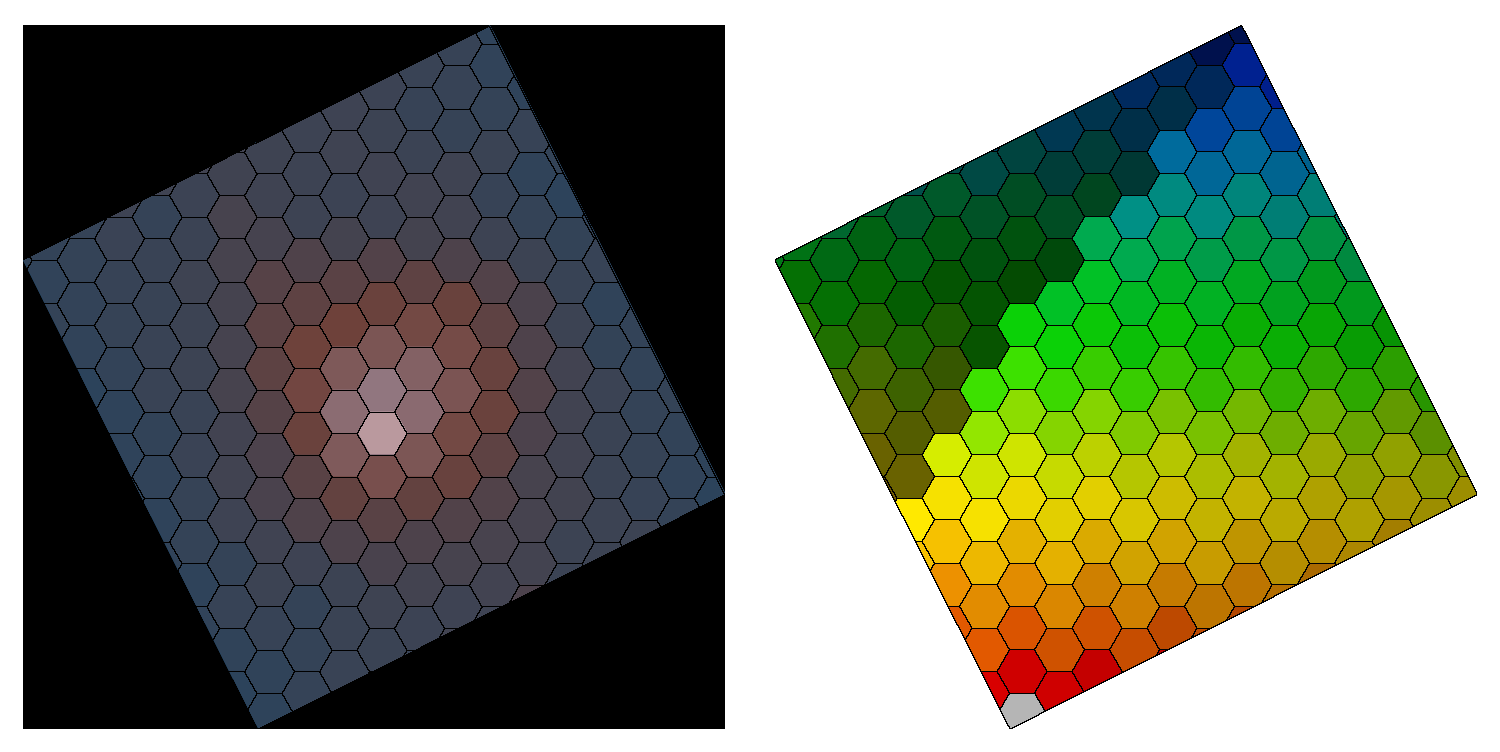

In [10]:
ds9 -geometry 1500x800 hexgrid/hex50px.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask hexgrid/hex50px.grad -nomask \
    hexgrid/hex50px.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask hexgrid/hex50px.grad -nomask \
    -saveimage png hexgrid/hex50px.png -exit

display < hexgrid/hex50px.png